<a id='intro_keras'></a>
#  Keras Introduction 

First of all, let's see how we can create, train, evaluate and use models in [Keras](https://keras.io/api/models/). We will divide the process into the following steps:

- **Definition** of the model
- **Compilation** of the model
- **Training** of the model
- **Evaluation** of the model
- Make **predictions**

<a id='definition'></a>
## 1. Model definition

To define the architecture of the network. That is, number of layers, type of each layer, number of neurons per layer, activation function per layer, ...

There are [three ways to create models with Keras](https://keras.io/api/models/):
- **Sequencial Model**
- **Functional API**
- **Model Subclassing**

As we have studied, the simplest neural networks are made up of sequentially connected layers where the output of each layer is connected to the input of the next layer, from the input layer to the output layer. In these cases, it will be essential that there is only one input layer and one output layer. For this type of model it is possible and sufficient to use the **[Sequential API of Keras](https://keras.io/guides/sequential_model/)**.

For models with non-sequential topology, where feedback loops may exist, may have multiple inputs and/or outputs, or may shared layers, it is necessary to rigorously define the connections between layers. For these cases it will be necessary to use  the **[Functional API of Keras](https://keras.io/guides/functional_api/)**.

**By default, the weights and biases of each neuron are assigned randomly. During training, these values vary in order to minimize the selected cost function.**


Fully connected layers are defined using the [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) class. We can specify the number of neurons as the first argument, and specify the activation function using the activation argument.

```python
tf.keras.layers.Dense(
    units, activation=None
)

```

- **units**: Number of neurons in the layer.
- **activation**: Activation function to use, default function is `linear`, you can also use `sigmoid` for sigmoid activation or [other alternatives](https://www.tensorflow.org/api_docs/python/tf/keras/activations) 

For defining the input layer you can use `keras.Input(shape=(input_dimension,))` or define your input dimension in the first hidden layer.

```python
layers.Dense(4, activation="sigmoid", input_shape=(input_dimension,))

```

Below are examples of sequential and functional types taking as reference a network made up of:

- One **input with 8 features (input_shape)**
- **Two hidden dense layers**, both with **4 neurons** and implemented with  **sigmoid activating function**
- **One Output** (linear output activation function)







### Sequential Model
```python
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers

    model = keras.Sequential(
        [
            keras.Input(shape=(8,)),
            layers.Dense(4, activation='sigmoid', name='layer1'),
            layers.Dense(4, activation='sigmoid', name='layer2'),
            layers.Dense(1, name='layer3')
        ]
    )
```

Similarly, it is also possible to define a sequential model incrementally with the method `add()`:
```python
    model = keras.Sequential()
    model.add(keras.Input(shape=(8,)))
    model.add(layers.Dense(4, activation='sigmoid', name='layer_1'))
    model.add(layers.Dense(4, activation='sigmoid', name='layer_2'))
    model.add(layers.Dense(1, name='output_layer'))
```
    
    
A possible alternative to include the object `Input` at the beginning of the network is to define in the first layer the dimension of the input data using the parameter `input_shape`:
```python
    model = keras.Sequential()
    model.add(layers.Dense(4, activation='sigmoid', input_shape=(8,), name='layer_1'))
    model.add(layers.Dense(4, activation='sigmoid', name='layer_2'))
    model.add(layers.Dense(1, name='output_layer'))
```
    
Despite being a simple and fast way to build simple models, it would not be appropriate to use it in the following situations:

- The model has multiple inputs and/or outputs
- Some of the layers have multiple inputs and/or outputs
- Some of the layers is shared
- The network topology is non-linear

### Functional API

The Keras Functional API allows defining the topology of the models as a [acyclic directed graph](https://en.wikipedia.org/wiki/Directed_acyclic_graph) of layers. Next we will build the same model as in the previous section but using the Keras Functional API.

You need to start with an input data entry:
```python    
    inputs = keras.Input(shape=(8,))
```
    
We define the layers that we will include in the network and the relationships between them. It is important to note that each line details the type of layer and its properties (number of neurons, activation function, name ...) and just at the end, in parentheses, the name of the variable in which we have saved the layer from which its output will connect to the input of the layer we are declaring.
```python
layer_1 = layers.Dense(4, activation='sigmoid',
                       name='layer_1')(inputs)
layer_2 = layers.Dense(4, activation='sigmoid',
                       name='layer_2')(layer_1)
```

The "layer call" `Dense()(inputs)` action is like drawing an arrow from "inputs" to this layer you created. You're "passing" the inputs to the dense layer, and you get `layer_1` as the output.

  

Finally, we define the network outputs:
```python
outputs = layers.Dense(1, name='output_layer')(layer_2)
```

We create the model specifying the inputs and outputs:
```python
model = keras.Model(inputs=inputs, outputs=outputs)
```

For printing  a summary of the network we can use:
```python
model.summary()
```



## Examples

Requirements:

- numpy
- pandas
- scikit-learn
- matplotlib
- tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

Check TensorFlow version > 2

In [2]:
print(tf.__version__)

2.4.0


### Sequential Model Example


In [3]:
model = keras.Sequential(name='example_model')
model.add(layers.Dense(4, activation='relu', input_shape=(8,), name='layer_1'))
model.add(layers.Dense(4, activation='relu', name='layer_2'))
model.add(layers.Dense(1, name='output_layer'))

model.summary()

Model: "example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
layer_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________



The first weights matrix connects the input layer (8 dimensions) and the first hidden layer (4 neurons), 8*4 weights + 4 bias = 36 params.

The second weights matrix connects the first hidden layer (4 neurons) and the second hidden layer (4 neurons), 4*4 weights + 4 bias = 20 params.

The last weight matrix connects the second hidden layer (4 neurons) with the output layer (1 neuron), 4*1 weights + 1 bias = 5 params.

### Funnctional API Example

In [4]:
inputs = keras.Input(shape=(8,), name='input_layer')
l_1 = layers.Dense(4, activation='sigmoid', name='layer_1')(inputs)
l_2 = layers.Dense(4, activation='sigmoid', name='layer_2')(l_1)    
outputs = layers.Dense(1, name='output_layer')(l_2)
model = keras.Model(inputs=inputs, outputs=outputs, name='example_model')

model.summary()

Model: "example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 8)]               0         
_________________________________________________________________
layer_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
layer_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


We can visualize the network with [`plot_model`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)
```python
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False,
    show_dtype=False, show_layer_names=True
)
```

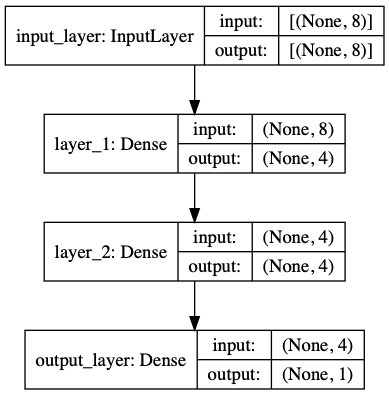

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

<a id='info_layers'></a>
The information and properties of each layer included in the model can be accessed as follows:

In [6]:
model.layers

As mentioned in the previous section, the values of the weights are assigned randomly. That is, if we recreate the same model and visualize the weights, they will be different each time.

We can access them by calling, **in the choosen layer**, the method `get_weights()`. This method returns the weights and biases.

It is important to know that the dimension of both results (weights and biases) is **number_of_neurons_in_previous_layer x number_of_neurons_in_the_layer**
    
In the following example we visualize the weights and biases of the first hidden layer. Since there 8 values in the previous layer (input dimension) and the layer has 4 neurons, the dimension of the variable
`weights` will be (8, 4).

This means that, for the layer where we obtain the weights:

    weights[0][0] corresponds to the weight that the first neuron of the input  layer gives to the first neuron of the first hidden layer
    weights[1][0] corresponds to the weight that the second neuron of the input  layer gives to the first neuron of the first hidden layer
    weights[2][0] corresponds to the weight that the third neuron of the input  layer gives to the first neuron of the first hidden layer
    ...
    weights[0][1] corresponds to the weight that the first neuron of the input  layer gives to the second neuron of the first hidden layer
    weights[0][2] corresponds to the weight that the first neuron of the input  layer gives to the third neuron of the first hidden layer
    weights[0][3] corresponds to the weight that the first neuron of the input  layer gives to the fourth neuron of the first hidden layer
    ...
    weights[7][3] corresponds to the weight that the last neuron of the layer gives to the last input
    
**Simplified**:

    weights[i][j]  corresponds to the weight that the i-neuron of the layer gives to the j-input
    
The variable `biases` dimension will be  (4,), one bias by neuron.

In [7]:
weights, biases = model.layers[1].get_weights()

In [8]:
weights.shape

(8, 4)

In [9]:
biases.shape

(4,)

In [10]:
print("Weights of first hidden layer:\n{}".format(weights))

Weights of first hidden layer:
[[ 0.39480036 -0.63766193 -0.05382407  0.3189817 ]
 [-0.42321184 -0.30371776 -0.1413027  -0.47936797]
 [ 0.27441406  0.13023257  0.4041323   0.56149346]
 [ 0.51600367  0.00953531 -0.36351994 -0.45721155]
 [-0.6977456  -0.42602995 -0.17820698  0.5391293 ]
 [ 0.30644566 -0.39847618  0.3243454   0.5953111 ]
 [-0.3634358   0.353082   -0.16162336  0.62267584]
 [-0.33512846  0.09950733  0.06153357 -0.5654168 ]]


In [11]:
print("Biases of first hidden layer:\n{}".format(biases))

Biases of first hidden layer:
[0. 0. 0. 0.]


#### Feature extraction

Every layer has an `input` and `output` attribute. These attributes can be used to extract the outputs of all intermediate layers.


In [12]:
features_list = [layer.output for layer in model.layers]
# Use these features to create feature-extraction model
# that returns the values of the intermediate layer activations:
feat_extraction = keras.Model(inputs=model.input, outputs=features_list)

In [13]:
# Call feature extractor on test input.
x = tf.ones((1,8))
print('input: ', x)
features = feat_extraction(x)
for i,out in enumerate(features):
    print('Layer {0} activations {1}'.format(i,out))
    
print('model predictiion', model.predict(x))

input:  tf.Tensor([[1. 1. 1. 1. 1. 1. 1. 1.]], shape=(1, 8), dtype=float32)
Layer 0 activations [[1. 1. 1. 1. 1. 1. 1. 1.]]
Layer 1 activations [[0.4187619  0.23621774 0.4729101  0.75687   ]]
Layer 2 activations [[0.5551595  0.49518558 0.42835253 0.6202408 ]]
Layer 3 activations [[-0.3528573]]
model predictiion [[-0.3528573]]


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
activation_1 = sigmoid(x.numpy().dot(weights)+biases)

print('activation_1: ', activation_1)

activation_1:  [[0.41876188 0.23621774 0.4729101  0.75687   ]]


### Class Example
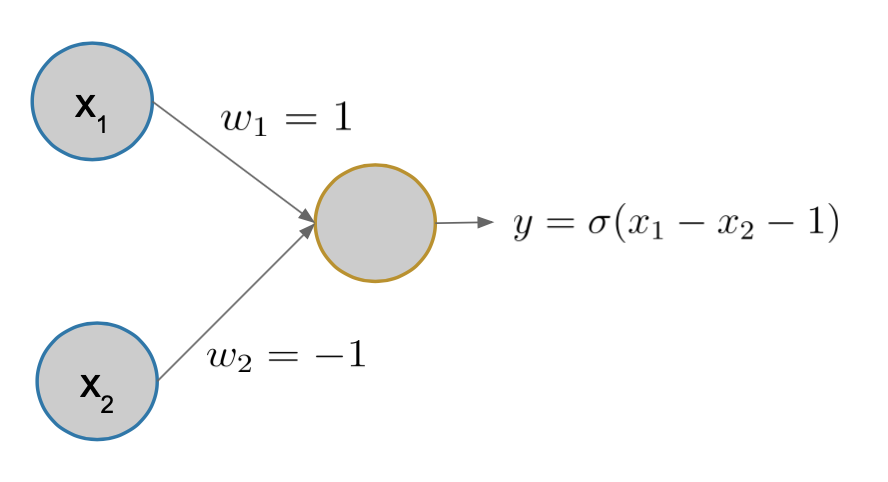

In [15]:
model = keras.Sequential(name='example_model')
model.add(
    layers.Dense(1, activation='sigmoid',
                 input_shape=(2, ), name='ouput'))
model.summary()

Model: "example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ouput (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


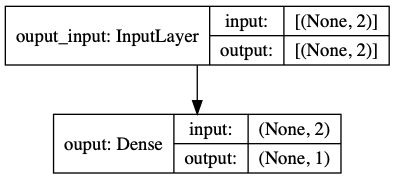

In [16]:
plot_model(model, show_shapes=True)

In [17]:
## See the weights
print('Layers: ', model.layers)
W, b = model.layers[0].get_weights()
print('Weights:{0} , shape:{1}'.format(W, W.shape))
print('Biases:{0} , shape:{1}'.format(b, b.shape))

Layers:  [<tensorflow.python.keras.layers.core.Dense object at 0x7faebfc5c048>]
Weights:[[-0.22941029]
 [-1.2790561 ]] , shape:(2, 1)
Biases:[0.] , shape:(1,)


We can change the weights with `set_weights`:

In [18]:
W_new = np.array([[1], [-1]], dtype=np.float32)
b_new = np.array([-1])
# Change the weights manually
model.layers[0].set_weights([W_new, b_new])
# New Network weights
model.layers[0].get_weights()

[array([[ 1.],
        [-1.]], dtype=float32),
 array([-1.], dtype=float32)]

In [19]:
# Output
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
point = np.array([[-1, -2]])
model.predict(point), sigmoid(point[0][0]-point[0][1]-1)

(array([[0.5]], dtype=float32), 0.5)

<a id='compilacion'></a>
## 2. Model Compilation

Once the network architecture has been defined, it is necessary to define the **training configuration**. To do this, we use the `compile()` method of  de Keras ([link to documentation](https://keras.io/api/models/model_training_apis/#compile-method)).

Some of the parameters that we can define are the following:

- **optimizers**: allows selecting the algorithm used to solve the gradient descent problem during network training [1].
- **loss**: allows defining the loss function to be used during model training [2].
- **metrics**: allows you to define a function to measure the performance of the model. Keras implements [3] the calculation of a multitude of metrics for different purposes.

The syntax is the following:
```python
    model.compile(
        optimizer=...,# tf.keras.optimizers.Adam()
        loss=...,# tf.keras.losses.SparseCategoricalCrossEntropy()
        metrics=...# tf.keras.metrics.SparseCategoricalAccuracy()
    )
```

In addition to directly calling the corresponding classes (`tfk.keras.optimizers`,` tf.keras.losses` and `tf.keras.metrics`), it is also possible to assign an alias (` 'mse'` is equivalent to ` tf.keras.losses.MSE`).

Links:
* [1] *Optimizers*: https://keras.io/api/optimizers/
    
* [2] *Losses*: https://keras.io/api/losses/
    1. Regression Losses:
        * Mean squared error: `tf.keras.losses.MeanSquaredError()`
        * Mean absolute error: `tf.keras.losses.MeanAbsoluteError()`
    2. Classification losses:
        * Binary cross-entropy: `tf.keras.losses.BinaryCrossentropy`
        * Categorical  cross-entropy:`tf.keras.losses.CategoricalCrossentropy`
        * Sparse categorical  cross-entropy:`tf.keras.losses.SparseCategoricalCrossentropy`
        
* [3] *Metrics*: https://keras.io/api/metrics/
    You can use same functions as  losses, but changing `tf.keras.losses.x` to `tf.keras.metrics.x` or use others like *Accuracy* for classification tasks `tf.keras.metrics.Accuracy`
    
For example,

```python
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
```

is the same as:

```python
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
```

<a id='entrenamiento'></a>
## 3. Model training

Similar to training classical machine learning models, Keras implements a `fit ()` method.

Various parameters can be configured (more information in the [documentation](https://keras.io/api/models/model_training_apis/#fit-method) ). Among other parameters, and for the scope of this exercise, we will focus on:

- **x**: Input data.
- **y**: target.
- **batch_size**: number of samples used in each gradient update. Default 32.
- **epochs**: Number of epochs to train the model. An epoch is a complete iteration over all the data used as input (`x` and` y`).
- **validation_split**: fraction of the training data to be used as the validation set. Real value between 0 and 1.
- **verbose**: 0, 1 or 2. Allows you to configure the amount and format of the information displayed during training.


The `fit ()` method returns a `History` object that stores the values of the cost function and the chosen metrics during all training periods, both for the training and validation sets.

Example:
```python
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, verbose=1)
```

<a id='evaluacion'></a>
## 4. Model Evaluation

The Keras `evaluate()` method returns, for a test data set, the values for the cost function and the selected metrics. The calculation is done in batches of size 32 by default. [Documentation](https://keras.io/api/models/model_training_apis/#evaluate-method).

Example:
```python
    results = model.evaluate(X_test, y_test, verbose=1)
```


<a id='prediccion'></a>
## 5. Making Predictions

Once the model has been built, trained and evaluated, we can make predictions with the `predict()` method ([link](https://keras.io/api/models/model_training_apis/#predict-method)).

Like the `fit()` and `evaluate()` methods, the computation is performed on *batches* of dimension 32 by default.

Example:

    preds = model.predict(X_test)

<a id='proceso_completo'></a>
# Complete process

Let's see the entire process in an example:

We load the Iris dataset for a multiclass classification problem.

In [20]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
data = pd.DataFrame(
    data=np.c_[
        iris['data'],
        iris['target']
    ],
    columns=iris['feature_names']+['target']
)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [21]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

Target processing

In [22]:
num_classes = 3
Y = tf.keras.utils.to_categorical(y, num_classes)

train/test split:

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=0
)

We define the architecture.

- The input will have a dimension equal to the number of independent variables.
- The output layer, being a multiclass classification problem, will be composed of as many neurons as there are different classes in the target variable. In this case there are three (setosa, virginica and versicolor). In addition, the activation function will be the [softmax](https://keras.io/api/layers/activations/#softmax-function) function  that will return the probability of belonging to each class. That is, the first neuron will return the probability of belonging to class 0, the second neuron to class 1 and the third to class 2.
- Two hidden layers with 16 units each are included and [sigmoid](https://keras.io/api/layers/activations/#sigmoid-function) as activation function. The decision to include these layers in such a configuration is completely arbitrary.

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(4,), name='input_layer')  # input

l_1 = layers.Dense(16, activation='sigmoid', name='layer_1')(inputs)  # hidden layer 1
l_2 = layers.Dense(16, activation='sigmoid', name='layer_2')(l_1)  # hidden layer 2

outputs = layers.Dense(3, activation='softmax', name='output_layer')(l_2)  # ouputs

model = keras.Model(inputs=inputs, outputs=outputs, name='example_model')  # Make the model

Check the model

In [25]:
model.summary()

Model: "example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 4)]               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                80        
_________________________________________________________________
layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


**Compile** the model

In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



**We train the model**. For the example, we set the number of epochs to 20 (`epochs = 20`) and 20% for validation (` validation_split = 0.2`).

We can observe the results for the cost function and for the metrics that we have defined for the training and validation sets in each epoch. During execution, the approximate time remaining in each epoch (ETA = Estimated Time of Arrival), and the duration of past epochs are shown.

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.2, verbose=1, batch_size=32)

Epoch 1/30
3/3 [==============================] - 3s 1s/step - loss: 1.2055 - accuracy: 0.3919 - val_loss: 1.2376 - val_accuracy: 0.2917
Epoch 2/30
3/3 [==============================] - 0s 59ms/step - loss: 1.1629 - accuracy: 0.4115 - val_loss: 1.2138 - val_accuracy: 0.2917
Epoch 3/30
3/3 [==============================] - 0s 94ms/step - loss: 1.1827 - accuracy: 0.3802 - val_loss: 1.1919 - val_accuracy: 0.2917
Epoch 4/30
3/3 [==============================] - 0s 63ms/step - loss: 1.1735 - accuracy: 0.3607 - val_loss: 1.1724 - val_accuracy: 0.2917
Epoch 5/30
3/3 [==============================] - 0s 87ms/step - loss: 1.1415 - accuracy: 0.3841 - val_loss: 1.1575 - val_accuracy: 0.2917
Epoch 6/30
3/3 [==============================] - 0s 70ms/step - loss: 1.1386 - accuracy: 0.3763 - val_loss: 1.1456 - val_accuracy: 0.2917
Epoch 7/30
3/3 [==============================] - 0s 55ms/step - loss: 1.0857 - accuracy: 0.4232 - val_loss: 1.1365 - val_accuracy: 0.2917
Epoch 8/30
3/3 [=============

With the `history` variable, we can **analyze how the value of the cost function and the metrics has evolved in each epoch**.

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.208983,0.385417,1.237608,0.291667,0
1,1.187324,0.385417,1.213791,0.291667,1
2,1.170410,0.385417,1.191931,0.291667,2
3,1.154470,0.385417,1.172365,0.291667,3
4,1.139004,0.385417,1.157458,0.291667,4


We visualize the **evolution of the values of the loss function in each of the epochs**.

As expected, the values for the training set are lower than for the validation set. Furthermore, for both series, the values are less and less, which translates into the correct learning of the model period by period.

In [29]:
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')

plt.plot(hist['epoch'], hist['loss'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_loss'],
       label = 'Val Error')

plt.legend();
plt.show()

<Figure size 640x480 with 1 Axes>

**Evaluate** the model

In [30]:
results = model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 96ms/step - loss: 1.1098 - accuracy: 0.2000


In [31]:
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 1.109777808189392
Test Accuracy: 0.20000000298023224


And finally, we make some **predictions**.

In the following example we will use the first row of the test data set.

As the last layer of the network has three units (neurons) whose activation function is a softmax, it can be observed how the prediction result is the estimated probabilities for each class.

In [32]:
model.predict(X_test[:1])

array([[0.32133788, 0.27803314, 0.400629  ]], dtype=float32)

We can compare these values with the real ones taking the highest probability. In this case, the highest probability corresponds to the correct class.

In [33]:
y_test[:1]

array([[0., 0., 1.]], dtype=float32)

It is possible to get the prediction for a subset of data at one time.

In [34]:
model.predict(X_train[:5])

array([[0.31734955, 0.28037784, 0.40227267],
       [0.32505748, 0.2782682 , 0.3966744 ],
       [0.35971037, 0.26497558, 0.37531403],
       [0.322849  , 0.27820858, 0.39894244],
       [0.31599578, 0.28050178, 0.40350246]], dtype=float32)

We can "build" an input "by hand", for example, as in the following example.

It is essential to always be careful with the dimensions of the data at the input and the dimension of the input of the network.

In [35]:
sepal_length = 4.8
sepal_width = 3.3
petal_length = 1.4
petal_width = 0.2

model.predict(
    np.array([
        [sepal_length, sepal_width, petal_length, petal_width]
    ])
)

array([[0.35984278, 0.2651467 , 0.37501052]], dtype=float32)

### Save and load the model

In [36]:
model.save('path/to/location')
model_load = keras.models.load_model('path/to/location')

INFO:tensorflow:Assets written to: path/to/location/assets


**Keras H5 format**

Keras also supports saving a single HDF5 file containing the model's architecture, weights values, and compile() information. It is a light-weight alternative to SavedModel.

In [37]:
model.save("my_h5_model.h5")

### Practice

Make the same model with the sequential way

In [38]:
model = keras.Sequential(name='example_model')

## hidden layers (remember the input dimension in the first hidden layer)
model.add(...

## ouput layer

model.summary()

SyntaxError: invalid syntax (<ipython-input-38-b1afe586c0aa>, line 8)

In [ ]:
# Compile the model

In [ ]:
## train the model
history = ...

In [ ]:
## plot the results
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')

plt.plot(hist['epoch'], hist['loss'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_loss'],
       label = 'Val Error')

plt.legend();
plt.show()

In [ ]:
# Evaluate the model
results = ...
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Repeate the process varying the number of layers, neurons or epochs and compare the results 

In [ ]:
model = keras.Sequential(name='example_model')

## hidden layers (remember the input dimension in the first hidden layer)
model.add(...

## ouput layer

model.summary()

In [ ]:
# Compile and fit the model with different number of epochs and batch_size

In [ ]:
## Compare the results with different models
results = ...
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [8, 4, 4, 1])
#fig.savefig('nn.png')

In [ ]:
draw_neural_net(ax, .1, .9, .1, .9, [8, 4, 4, 1])